In [5]:
import pandas as pd

In [6]:
from sodapy import Socrata

In [7]:
client = Socrata("health.data.ny.gov", None)

In [26]:
results = client.get("xdss-u53e", county='Nassau', limit=600)

In [9]:
# Convert to pandas DataFrame

In [10]:
results_df = pd.DataFrame.from_records(results)

In [11]:
results_df

,test_date,county,new_positives,cumulative_number_of_positives,total_number_of_tests,cumulative_number_of_tests
0,2020-03-01T00:00:00.000,Nassau,0,0,0,0
1,2020-03-02T00:00:00.000,Nassau,0,0,0,0
2,2020-03-03T00:00:00.000,Nassau,0,0,0,0
3,2020-03-04T00:00:00.000,Nassau,0,0,0,0
4,2020-03-05T00:00:00.000,Nassau,1,1,1,1
...,...,...,...,...,...,...
342,2021-02-06T00:00:00.000,Nassau,870,134227,17518,2579304
343,2021-02-07T00:00:00.000,Nassau,664,134891,12764,2592068
344,2021-02-08T00:00:00.000,Nassau,820,135711,14458,2606526
345,2021-02-09T00:00:00.000,Nassau,566,136277,10493,2617019


In [28]:
# Convert columns to numeric - to be on the safe side

In [13]:
results_df[['new_positives', 'cumulative_number_of_positives','total_number_of_tests','cumulative_number_of_tests']] = results_df[['new_positives', 'cumulative_number_of_positives','total_number_of_tests','cumulative_number_of_tests']].apply(pd.to_numeric)

In [12]:
from datetime import datetime

In [14]:
 %matplotlib

Using matplotlib backend: MacOSX


In [15]:
%matplotlib inline

In [19]:
results_df['test_date']

0      2020-03-01T00:00:00.000
1      2020-03-02T00:00:00.000
2      2020-03-03T00:00:00.000
3      2020-03-04T00:00:00.000
4      2020-03-05T00:00:00.000
                ...           
342    2021-02-06T00:00:00.000
343    2021-02-07T00:00:00.000
344    2021-02-08T00:00:00.000
345    2021-02-09T00:00:00.000
346    2021-02-10T00:00:00.000
Name: test_date, Length: 347, dtype: object

In [ ]:
# Convert values in 'test_date' column from ISO to datetime

In [20]:
results_df['test_date'] = pd.to_datetime(results_df['test_date'])

In [21]:
results_df['test_date']

0     2020-03-01
1     2020-03-02
2     2020-03-03
3     2020-03-04
4     2020-03-05
         ...    
342   2021-02-06
343   2021-02-07
344   2021-02-08
345   2021-02-09
346   2021-02-10
Name: test_date, Length: 347, dtype: datetime64[ns]

In [22]:
results_df

,test_date,county,new_positives,cumulative_number_of_positives,total_number_of_tests,cumulative_number_of_tests
0,2020-03-01,Nassau,0,0,0,0
1,2020-03-02,Nassau,0,0,0,0
2,2020-03-03,Nassau,0,0,0,0
3,2020-03-04,Nassau,0,0,0,0
4,2020-03-05,Nassau,1,1,1,1
...,...,...,...,...,...,...
342,2021-02-06,Nassau,870,134227,17518,2579304
343,2021-02-07,Nassau,664,134891,12764,2592068
344,2021-02-08,Nassau,820,135711,14458,2606526
345,2021-02-09,Nassau,566,136277,10493,2617019


In [29]:
# Plot

<AxesSubplot:xlabel='test_date'>

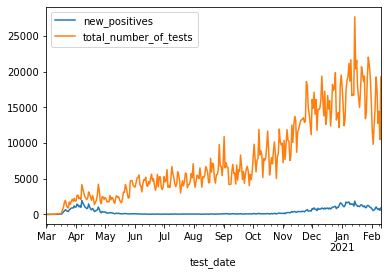

In [23]:
results_df.plot(x="test_date", y=["new_positives","total_number_of_tests"])